A primeira empresa, Bloco de Código, precisa de um dashboard para monitorar a sua campanha de marketing durante o ano que a campanha foi realizada.

![](assets/logo-bloco-de-codigo.png)

### Explorando os dados

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [181]:
dados_artigos = pd.read_csv("assets/campanha bloco de código - Artigos.csv")
dados_artigos.describe()

,Campanha,Visitas Diretas,Novos usuários únicos,Clicks pagos,Clicks redes sociais,Vezes pesquisados
count,14104.0,14104.000000,14104.000000,14105.000000,14104.000000,14104.000000
mean,1047.0,93.232420,116.103359,1.596260,144.395955,61.220490
std,0.0,158.550484,174.454669,25.763735,194.516718,128.602467
min,1047.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1047.0,11.000000,15.000000,0.000000,19.000000,6.000000
50%,1047.0,32.000000,45.000000,0.000000,61.000000,16.000000
75%,1047.0,97.000000,137.250000,0.000000,187.000000,51.000000
max,1047.0,999.000000,998.000000,842.000000,998.000000,998.000000


In [182]:
dados_artigos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Article URL                 14104 non-null  object 
 1   Nome do artigo              14104 non-null  object 
 2   Categoria                   14104 non-null  object 
 3   Campanha                    14104 non-null  float64
 4   Data                        14104 non-null  object 
 5   Visitas Diretas             14104 non-null  float64
 6   Novos usuários únicos       14104 non-null  float64
 7   Clicks pagos                14105 non-null  float64
 8   Tempo de leitura (minutos)  14104 non-null  object 
 9   Clicks redes sociais        14104 non-null  float64
 10  Vezes pesquisados           14104 non-null  float64
 11  Visualizações               14104 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.3+ MB


In [183]:
# Informação da quantidade de colunas e linhas
dados_artigos.shape

(14105, 12)

In [184]:
# Percentual de NaN por coluna
(dados_artigos.isnull().sum() / dados_artigos.shape[0]) * 100

Article URL                   0.00709
Nome do artigo                0.00709
Categoria                     0.00709
Campanha                      0.00709
Data                          0.00709
Visitas Diretas               0.00709
Novos usuários únicos         0.00709
Clicks pagos                  0.00000
Tempo de leitura (minutos)    0.00709
Clicks redes sociais          0.00709
Vezes pesquisados             0.00709
Visualizações                 0.00709
dtype: float64

### Transformando Dados

In [185]:
# Apagando dados NaN - menos de 1%, no caso uma linha que havia total
dados_artigos.dropna(inplace=True)

In [186]:
dados_artigos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14104 entries, 0 to 14103
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Article URL                 14104 non-null  object 
 1   Nome do artigo              14104 non-null  object 
 2   Categoria                   14104 non-null  object 
 3   Campanha                    14104 non-null  float64
 4   Data                        14104 non-null  object 
 5   Visitas Diretas             14104 non-null  float64
 6   Novos usuários únicos       14104 non-null  float64
 7   Clicks pagos                14104 non-null  float64
 8   Tempo de leitura (minutos)  14104 non-null  object 
 9   Clicks redes sociais        14104 non-null  float64
 10  Vezes pesquisados           14104 non-null  float64
 11  Visualizações               14104 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.4+ MB


In [187]:
# Convertando string em datetime
dados_artigos["Data"] = pd.to_datetime(dados_artigos["Data"])

In [188]:
# Trantando Coluna Tempo de Leitura removendo espaços
dados_artigos["Tempo de leitura (minutos)"] = dados_artigos["Tempo de leitura (minutos)"].str.strip()

In [189]:
# Trantando Coluna Tempo de Leitura removendo pontos
dados_artigos["Tempo de leitura (minutos)"] = dados_artigos["Tempo de leitura (minutos)"].str.replace(".", "")

In [190]:
# Trantando Coluna Tempo de Leitura convertendo de string para int
dados_artigos["Tempo de leitura (minutos)"] = pd.to_numeric(dados_artigos["Tempo de leitura (minutos)"])

In [191]:
# Trantando Coluna Visualizações removendo espaços
dados_artigos["Visualizações"] = dados_artigos["Visualizações"].str.strip()

In [192]:
# Trantando Coluna Visualizações removendo pontos
dados_artigos["Visualizações"] = dados_artigos["Visualizações"].str.replace(".", "")

In [193]:
# Trantando Coluna Visualizações convertendo de string para int
dados_artigos["Visualizações"] = pd.to_numeric(dados_artigos["Visualizações"])

In [194]:
# Categorias
dados_artigos["Categoria"].value_counts()

Categoria
Gestão          4936
Data Science    3791
Tecnologia      2095
Negócios        1104
UX               825
DevOps           780
Programação      474
Marketing         99
Name: count, dtype: int64

In [195]:
# Artigos
dados_artigos["Nome do artigo"].value_counts()

Nome do artigo
Recomendações de experiência do usuário                         183
Equilibrando a criatividade e continuidade                      182
Como ler seu trabalho em voz alta melhora sua escrita           180
Treinando efetivamente suas novas contratações                  175
Tecnologia em que você deve investir agora                      173
                                                               ... 
6 maneiras de aumentar sua taxa de engajamento                    1
O maior equívoco sobre nuvem                                      1
Pense novamente: quem é sua maior competição?                     1
5 Estratégias para fornecer feedback dos funcionários             1
Como usar o feedback para acelerar o crescimento da carreira      1
Name: count, Length: 168, dtype: int64

In [196]:
# Quantidade de artigos únicos
quant_artigos = len(dados_artigos["Nome do artigo"].unique())
quant_artigos

168

In [215]:
lista_categorias = list(dados_artigos["Categoria"].unique())
lista_categorias

['Gestão',
 'Data Science',
 'Tecnologia',
 'Negócios',
 'Programação',
 'DevOps',
 'UX',
 'Marketing']

### Gerando informações

In [197]:
# Total de Clique
dados_artigos["TotalCliques"] = dados_artigos["Clicks pagos"] + dados_artigos["Clicks redes sociais"]
dados_artigos["TotalCliques"]

0        889.242
1        708.374
2        532.416
3        491.405
4        384.634
          ...   
14099      0.000
14100      0.000
14101      0.000
14102      0.000
14103      0.000
Name: TotalCliques, Length: 14104, dtype: float64

In [198]:
# Percentual de Cliques obtidos nas redes sociais
dados_artigos["PercentualCliqueRedesSociais"] = (dados_artigos["Clicks redes sociais"] / dados_artigos["TotalCliques"]) * 100
dados_artigos["PercentualCliqueRedesSociais"]

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
14099      NaN
14100      NaN
14101      NaN
14102      NaN
14103      NaN
Name: PercentualCliqueRedesSociais, Length: 14104, dtype: float64

In [199]:
# Percentual CTR Click Through Rate = Total de Clique / Total de Visualizações
dados_artigos["CTR"] = (dados_artigos["TotalCliques"] / dados_artigos["Visualizações"]) * 100
dados_artigos["CTR"]

0        0.051999
1        0.051996
2        0.051996
3        0.051995
4        0.051999
           ...   
14099         NaN
14100         NaN
14101         NaN
14102         NaN
14103         NaN
Name: CTR, Length: 14104, dtype: float64

In [200]:
# Percentual de vezes pesquisados
dados_artigos["PercentualVezPesquisado"] = (dados_artigos["Vezes pesquisados"] / dados_artigos["Visualizações"]) * 100
dados_artigos["PercentualVezPesquisado"]

0        0.009000
1        0.008999
2        0.008999
3        0.008999
4        0.009000
           ...   
14099         NaN
14100         NaN
14101         NaN
14102         NaN
14103         NaN
Name: PercentualVezPesquisado, Length: 14104, dtype: float64

In [201]:
# Percentual de cliques pagos
dados_artigos["PercentualCliquesPagos"] = (dados_artigos["Clicks pagos"] / dados_artigos["Visualizações"]) * 100
dados_artigos["PercentualCliquesPagos"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14099    NaN
14100    NaN
14101    NaN
14102    NaN
14103    NaN
Name: PercentualCliquesPagos, Length: 14104, dtype: float64

In [202]:
# percentual de visitas diretas
dados_artigos["PercentualVisitasDiritas"] = (dados_artigos["Visitas Diretas"] / dados_artigos["Visualizações"]) * 100
dados_artigos["PercentualVisitasDiritas"]

0        0.020000
1        0.019999
2        0.019998
3        0.019998
4        0.020000
           ...   
14099         NaN
14100         NaN
14101         NaN
14102         NaN
14103         NaN
Name: PercentualVisitasDiritas, Length: 14104, dtype: float64

In [203]:
#Buscar a média de visualização dos artigos.
media_visualizacoes = dados_artigos["Visualizações"].sum() / quant_artigos
media_visualizacoes

226352.80357142858

In [204]:
# Gerar limites visualizações
valor = dados_artigos["Visualizações"]
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [205]:
# Agrupando Artigos únicos e somando quantidade de visualizações
dadosArtigosVisualizacoes = dados_artigos.groupby("Nome do artigo")["Visualizações"].sum()
dadosArtigosVisualizacoes = pd.DataFrame(dadosArtigosVisualizacoes)

In [206]:
# Artigos acima da média de visualizações
dadosArtigosVisualizacoes.query("Visualizações >= @media_visualizacoes").sort_values(by="Visualizações", ascending=False)

,Visualizações
Nome do artigo,
Escuta ativa e como isso mudará sua abordagem,2695889
Conteúdo e marketing além do consumo em massa,1899028
Melhores práticas para gerenciamento de projetos,1804652
Conselho Executivo Parte 2: CFO,1760966
Observabilidade da ciência de dados para executivos,1450890
Como ler seu trabalho em voz alta melhora sua escrita,1241974
Aprenda quando ir com o fluxo,1204761
Desbloqueando o acesso aos seus dados,1161179
Principais dicas para consolidar sua pilha de tecnologia,1157479


In [207]:
# Artigos abaixo da média de visualizações
dadosArtigosVisualizacoes.query("Visualizações < @media_visualizacoes").sort_values(by="Visualizações", ascending=True)

,Visualizações
Nome do artigo,
Como usar o feedback para acelerar o crescimento da carreira,26
Principais habilidades da força de trabalho,55
Escolhendo os parceiros de tecnologia certos,63
Repensando e prevendo o futuro da publicidade por e -mail,69
"Onde, quando e como enviar sua escrita",75
...,...
Como facilitar on -line eficazes,206960
Modernizando seus aplicativos,211739
O que vem a seguir: criptomoeda,212731


In [208]:
# Agrupando categorias únicas e somando quantidade de visualizações
dadosCategoriasVisualizacoes = dados_artigos.groupby("Categoria")["Visualizações"].sum()
dadosCategoriasVisualizacoes = pd.DataFrame(dadosCategoriasVisualizacoes).reset_index()

In [209]:
# Categorias por quantidade de visualizações
dadosCategoriasVisualizacoes = dadosCategoriasVisualizacoes.sort_values(by="Visualizações", ascending=False)
dadosCategoriasVisualizacoes

,Categoria,Visualizações
2,Gestão,16287302
0,Data Science,9155203
6,Tecnologia,7370702
4,Negócios,2135005
7,UX,1491626
1,DevOps,965373
5,Programação,494231
3,Marketing,127829


<Axes: title={'center': 'Quantidade Visualizações por Catergoria'}, xlabel='Categoria'>

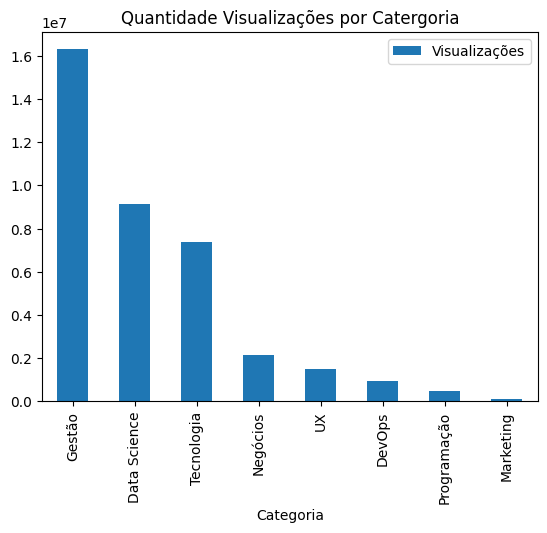

In [210]:
# Categorias por quantidade de visualizações - Gráfico
dadosCategoriasVisualizacoes.plot.bar(title="Quantidade Visualizações por Catergoria", x="Categoria")

In [211]:
# Agrupando categorias únicas e somando quantidade de tempo de leitura
dadosCategoriasTempo = dados_artigos.groupby("Categoria")["Tempo de leitura (minutos)"].sum().reset_index()
dadosCategoriasTempo = pd.DataFrame(dadosCategoriasTempo)
dadosCategoriasTempo = dadosCategoriasTempo.sort_values(by="Tempo de leitura (minutos)", ascending=False)
dadosCategoriasTempo

,Categoria,Tempo de leitura (minutos)
2,Gestão,41993610
0,Data Science,22093495
6,Tecnologia,20084998
4,Negócios,5582875
7,UX,3716613
1,DevOps,2721188
5,Programação,1122330
3,Marketing,300412


Text(0.5, 1.0, 'Dispersão Categoria (Tempo de Leitura)')

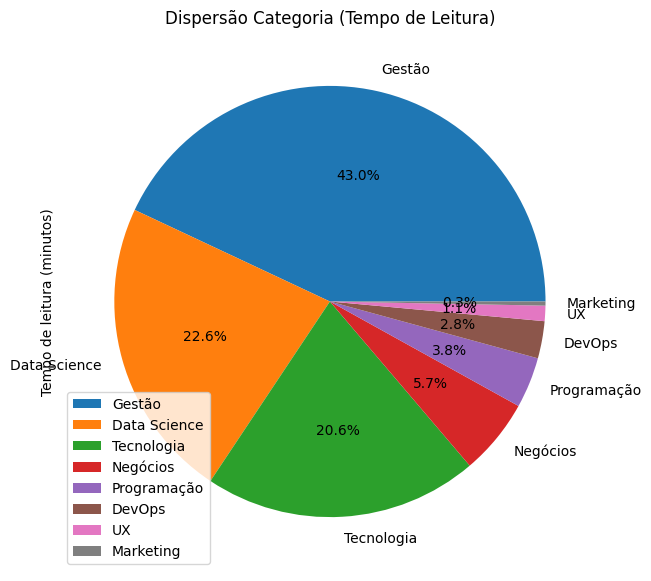

In [226]:
# Categorias por tempo de leitura- Gráfico
graficoTempoCategoria = dadosCategoriasTempo.plot.pie(y="Tempo de leitura (minutos)", labels=lista_categorias, autopct='%1.1f%%', figsize=(7,7))
graficoTempoCategoria.set_title("Dispersão Categoria (Tempo de Leitura)")